# **Importing libraries**

In [1]:
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt

# **Loading the results**

## **Fixed Channels**

In [98]:
resultsFixedChannels = pd.read_csv('resultsFixedChannels.csv')
resultsFixedChannels.channelCoefficients = resultsFixedChannels.channelCoefficients.apply(lambda x: x.strip().split(' '))
resultsFixedChannels

,typeOfChannel,delta,channelCoefficients,noiseVariance,SNR (dB),BPSKProbError,QAM4ProbError
0,h(i) = h(j),20.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",1.0000,0.000000,0.964750,1.00000
1,h(i) = h(j),20.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9975,0.010871,0.970250,1.00000
2,h(i) = h(j),20.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9950,0.021769,0.960750,1.00000
3,h(i) = h(j),20.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9925,0.032695,0.965500,1.00000
4,h(i) = h(j),20.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9900,0.043648,0.958375,1.00000
...,...,...,...,...,...,...,...
3595,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0125,19.030900,0.000000,0.00025
3596,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0100,20.000000,0.000000,0.00000
3597,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0075,21.249387,0.000000,0.00000
3598,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0050,23.010300,0.000000,0.00000


## **Random Channels**

In [74]:
resultsRandomChannels = pd.read_csv('resultsRandomChannels.csv')
resultsRandomChannels.delta = resultsRandomChannels.delta.apply(lambda x: x.strip().split(' '))
resultsRandomChannels.BPSKProbError = resultsRandomChannels.BPSKProbError.apply(lambda x: x.strip().split(' '))
resultsRandomChannels.QAM4ProbError = resultsRandomChannels.QAM4ProbError.apply(lambda x: x.strip().split(' '))

deltaConcat = resultsRandomChannels[['delta']].explode('delta')
BPSKProbErrorConcat = resultsRandomChannels[['BPSKProbError']].explode('BPSKProbError')
QAM4ProbErrorConcat = resultsRandomChannels[['QAM4ProbError']].explode('QAM4ProbError')
concatRight = pd.concat([deltaConcat,BPSKProbErrorConcat,QAM4ProbErrorConcat], axis = 1)

resultsRandomChannels = pd.concat([resultsRandomChannels.drop(['delta','BPSKProbError','QAM4ProbError'], axis = 1), concatRight], axis = 1).reset_index(drop = True)
resultsRandomChannels.noiseVariance = pd.to_numeric(resultsRandomChannels.noiseVariance)
resultsRandomChannels['SNR (dB)'] = pd.to_numeric(resultsRandomChannels['SNR (dB)'])
resultsRandomChannels.delta = pd.to_numeric(resultsRandomChannels.delta)
resultsRandomChannels.BPSKProbError = pd.to_numeric(resultsRandomChannels.BPSKProbError)
resultsRandomChannels.QAM4ProbError = pd.to_numeric(resultsRandomChannels.QAM4ProbError)

resultsRandomChannels

,typeOfChannel,noiseVariance,SNR (dB),delta,BPSKProbError,QAM4ProbError
0,randomUniform,1.00,0.000000,20.0,0.458587,0.703937
1,randomUniform,1.00,0.000000,30.0,0.344500,0.569375
2,randomUniform,1.00,0.000000,40.0,0.293600,0.500250
3,randomUniform,0.95,0.222764,20.0,0.454037,0.703550
4,randomUniform,0.95,0.222764,30.0,0.345712,0.570025
5,randomUniform,0.95,0.222764,40.0,0.289363,0.496013
6,randomUniform,0.90,0.457575,20.0,0.458450,0.703575
7,randomUniform,0.90,0.457575,30.0,0.341475,0.562550
8,randomUniform,0.90,0.457575,40.0,0.283938,0.489250
9,randomUniform,0.85,0.705811,20.0,0.456100,0.700600


# **Generating visualizations**

## **Fixed Channels**

In [103]:
resultsFixedChannelsDelta40 = resultsFixedChannels[resultsFixedChannels.delta == 40]
resultsFixedChannelsDelta40

,typeOfChannel,delta,channelCoefficients,noiseVariance,SNR (dB),BPSKProbError,QAM4ProbError
800,h(i) = h(j),40.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",1.0000,0.000000,0.439250,0.680250
801,h(i) = h(j),40.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9975,0.010871,0.438000,0.674625
802,h(i) = h(j),40.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9950,0.021769,0.433000,0.682125
803,h(i) = h(j),40.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9925,0.032695,0.425250,0.668750
804,h(i) = h(j),40.0,"[0.156174, 0.156174, 0.156174, 0.156174, 0.156...",0.9900,0.043648,0.434625,0.674750
...,...,...,...,...,...,...,...
3595,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0125,19.030900,0.000000,0.000250
3596,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0100,20.000000,0.000000,0.000000
3597,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0075,21.249387,0.000000,0.000000
3598,h(i) < h(j) if i < j,40.0,"[0.000193, 0.000235, 0.000287, 0.000351, 0.000...",0.0050,23.010300,0.000000,0.000000


In [104]:
resultsBPSK = resultsFixedChannelsDelta40[['typeOfChannel','BPSKProbError','SNR (dB)']].rename(columns = {'BPSKProbError': 'Probability Of Error'})
resultsBPSK['signalType'] = 'BPSK'
resultsQAM4 = resultsFixedChannelsDelta40[['typeOfChannel','QAM4ProbError','SNR (dB)']].rename(columns = {'QAM4ProbError': 'Probability Of Error'})
resultsQAM4['signalType'] = 'QAM-4'
resultsPlotDF = pd.concat([resultsBPSK, resultsQAM4])
resultsPlotDF

,typeOfChannel,Probability Of Error,SNR (dB),signalType
800,h(i) = h(j),0.439250,0.000000,BPSK
801,h(i) = h(j),0.438000,0.010871,BPSK
802,h(i) = h(j),0.433000,0.021769,BPSK
803,h(i) = h(j),0.425250,0.032695,BPSK
804,h(i) = h(j),0.434625,0.043648,BPSK
...,...,...,...,...
3595,h(i) < h(j) if i < j,0.000250,19.030900,QAM-4
3596,h(i) < h(j) if i < j,0.000000,20.000000,QAM-4
3597,h(i) < h(j) if i < j,0.000000,21.249387,QAM-4
3598,h(i) < h(j) if i < j,0.000000,23.010300,QAM-4


Text(0.5, 1.0, 'Probability of Error for different channels and signals types')

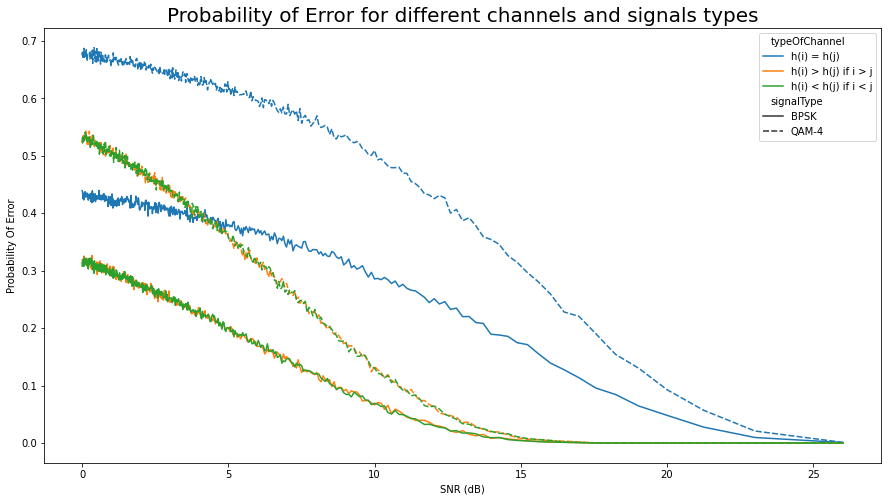

In [105]:
fig = plt.figure(figsize = (15,8))
sns.lineplot(data = resultsPlotDF, x = 'SNR (dB)', y = 'Probability Of Error', hue = 'typeOfChannel', style = 'signalType')
plt.title('Probability of Error for different channels and signals types', size = 20)

In [5]:
L = 41
xLabels = [f'h({i})' for i in range(L)]
channels = resultsFixedChannelsDelta40.loc[resultsFixedChannelsDelta40[['typeOfChannel']].drop_duplicates().index][['typeOfChannel','channelCoefficients']]
channels['h(i)'] = [xLabels for i in range(channels.shape[0])]
concatLeft = channels.drop('h(i)', axis = 1).explode('channelCoefficients')
concatRight = channels.drop('channelCoefficients', axis = 1).explode('h(i)')[['h(i)']]
channels = pd.concat([concatLeft, concatRight], axis = 1)
channels.channelCoefficients = channels.channelCoefficients.apply(lambda x: float(x))
channels

,typeOfChannel,channelCoefficients,h(i)
0,h(i) = h(j),0.156174,h(0)
0,h(i) = h(j),0.156174,h(1)
0,h(i) = h(j),0.156174,h(2)
0,h(i) = h(j),0.156174,h(3)
0,h(i) = h(j),0.156174,h(4)
...,...,...,...
800,h(i) < h(j) if i < j,0.257995,h(36)
800,h(i) < h(j) if i < j,0.315115,h(37)
800,h(i) < h(j) if i < j,0.384883,h(38)
800,h(i) < h(j) if i < j,0.470097,h(39)


Text(0.5, 1.0, 'Fixed channels')

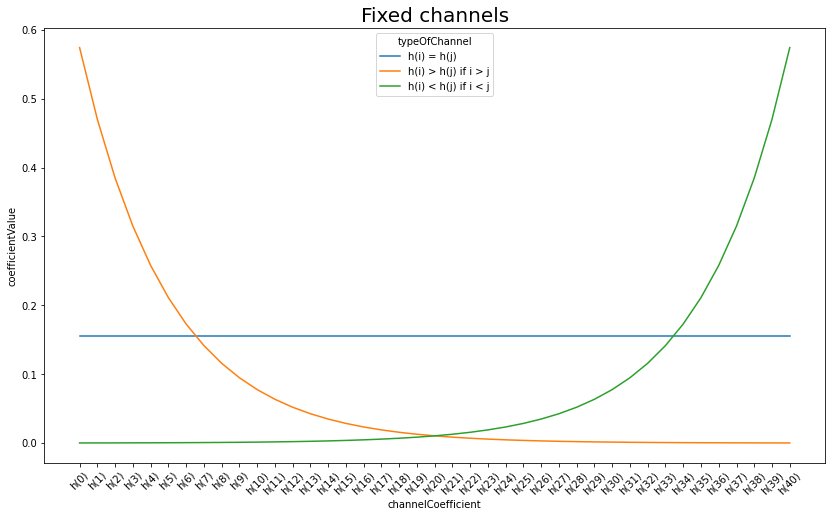

In [ ]:
fig = plt.figure(figsize = (14,8))
sns.lineplot(data = channels, x = 'h(i)', y = 'channelCoefficients', hue = 'typeOfChannel')
xTicks = plt.xticks(rotation = 45)
plt.xlabel('channelCoefficient')
plt.ylabel('coefficientValue')
plt.title('Fixed channels', size = 20)

## **Random Channels**

In [81]:
resultsRandomChannelsDelta40 = resultsRandomChannels[resultsRandomChannels.delta == 40]
resultsRandomChannelsDelta40

,typeOfChannel,noiseVariance,SNR (dB),delta,BPSKProbError,QAM4ProbError
2,randomUniform,1.00,0.000000,40.0,0.293600,0.500250
5,randomUniform,0.95,0.222764,40.0,0.289363,0.496013
8,randomUniform,0.90,0.457575,40.0,0.283938,0.489250
11,randomUniform,0.85,0.705811,40.0,0.280075,0.476600
14,randomUniform,0.80,0.969100,40.0,0.273863,0.471000
17,randomUniform,0.75,1.249387,40.0,0.267525,0.460600
20,randomUniform,0.70,1.549020,40.0,0.256150,0.448238
23,randomUniform,0.65,1.870866,40.0,0.250925,0.440012
26,randomUniform,0.60,2.218487,40.0,0.244725,0.407000
29,randomUniform,0.55,2.596373,40.0,0.234575,0.401288


In [82]:
resultsBPSK = resultsRandomChannelsDelta40[['typeOfChannel','BPSKProbError','SNR (dB)']].rename(columns = {'BPSKProbError': 'Probability Of Error'})
resultsBPSK['signalType'] = 'BPSK'
resultsQAM4 = resultsRandomChannelsDelta40[['typeOfChannel','QAM4ProbError','SNR (dB)']].rename(columns = {'QAM4ProbError': 'Probability Of Error'})
resultsQAM4['signalType'] = 'QAM-4'
resultsPlotDF = pd.concat([resultsBPSK, resultsQAM4])
resultsPlotDF

,typeOfChannel,Probability Of Error,SNR (dB),signalType
2,randomUniform,0.293600,0.000000,BPSK
5,randomUniform,0.289363,0.222764,BPSK
8,randomUniform,0.283938,0.457575,BPSK
11,randomUniform,0.280075,0.705811,BPSK
14,randomUniform,0.273863,0.969100,BPSK
17,randomUniform,0.267525,1.249387,BPSK
20,randomUniform,0.256150,1.549020,BPSK
23,randomUniform,0.250925,1.870866,BPSK
26,randomUniform,0.244725,2.218487,BPSK
29,randomUniform,0.234575,2.596373,BPSK


Text(0.5, 1.0, 'Probability of Error for random channels and different signals types')

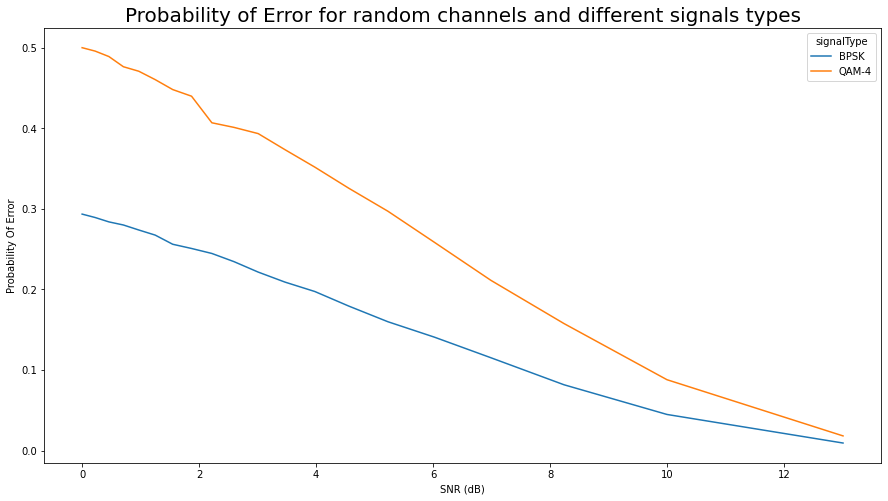

In [83]:
fig = plt.figure(figsize = (15,8))
sns.lineplot(data = resultsPlotDF, x = 'SNR (dB)', y = 'Probability Of Error', hue = 'signalType')
plt.title('Probability of Error for random channels and different signals types', size = 20)

## **Fixed Channels vs Random Channels**

In [6]:
resultsBPSK = resultsFixedChannels[['typeOfChannel','BPSKProbError','SNR (dB)']].rename(columns = {'BPSKProbError': 'Probability Of Error'})
resultsBPSK['signalType'] = 'BPSK'
resultsQAM4 = resultsFixedChannels[['typeOfChannel','QAM4ProbError','SNR (dB)']].rename(columns = {'QAM4ProbError': 'Probability Of Error'})
resultsQAM4['signalType'] = 'QAM-4'
resultsPlotDFFixedChannels = pd.concat([resultsBPSK, resultsQAM4])
resultsPlotDFFixedChannels

,typeOfChannel,Probability Of Error,SNR (dB),signalType
0,h(i) = h(j),0.435000,0.000000,BPSK
1,h(i) = h(j),0.441875,0.010871,BPSK
2,h(i) = h(j),0.428000,0.021769,BPSK
3,h(i) = h(j),0.434125,0.032695,BPSK
4,h(i) = h(j),0.429250,0.043648,BPSK
...,...,...,...,...
1195,h(i) < h(j) if i < j,0.000000,19.030900,QAM-4
1196,h(i) < h(j) if i < j,0.000000,20.000000,QAM-4
1197,h(i) < h(j) if i < j,0.000000,21.249387,QAM-4
1198,h(i) < h(j) if i < j,0.000000,23.010300,QAM-4


In [7]:
resultsBPSK = resultsRandomChannels[['typeOfChannel','BPSKProbError','SNR (dB)']].rename(columns = {'BPSKProbError': 'Probability Of Error'})
resultsBPSK['signalType'] = 'BPSK'
resultsQAM4 = resultsRandomChannels[['typeOfChannel','QAM4ProbError','SNR (dB)']].rename(columns = {'QAM4ProbError': 'Probability Of Error'})
resultsQAM4['signalType'] = 'QAM-4'
resultsPlotDFRandomChannels = pd.concat([resultsBPSK, resultsQAM4])
resultsPlotDFRandomChannels

,typeOfChannel,Probability Of Error,SNR (dB),signalType
0,randomUniform,0.296050,0.000000,BPSK
1,randomUniform,0.287813,0.222764,BPSK
2,randomUniform,0.283388,0.457575,BPSK
3,randomUniform,0.277050,0.705811,BPSK
4,randomUniform,0.272888,0.969100,BPSK
5,randomUniform,0.264512,1.249387,BPSK
6,randomUniform,0.260912,1.549020,BPSK
7,randomUniform,0.252975,1.870866,BPSK
8,randomUniform,0.243375,2.218487,BPSK
9,randomUniform,0.233125,2.596373,BPSK


In [10]:
bestFromFixedChannels = resultsPlotDFFixedChannels[resultsPlotDFFixedChannels.typeOfChannel == 'h(i) < h(j) if i < j']
linePlotDF = pd.concat([bestFromFixedChannels, resultsPlotDFRandomChannels])
linePlotDF

,typeOfChannel,Probability Of Error,SNR (dB),signalType
800,h(i) < h(j) if i < j,0.330875,0.000000,BPSK
801,h(i) < h(j) if i < j,0.312125,0.010871,BPSK
802,h(i) < h(j) if i < j,0.319375,0.021769,BPSK
803,h(i) < h(j) if i < j,0.321375,0.032695,BPSK
804,h(i) < h(j) if i < j,0.303250,0.043648,BPSK
...,...,...,...,...
15,randomUniform,0.257437,6.020600,QAM-4
16,randomUniform,0.215012,6.989700,QAM-4
17,randomUniform,0.157350,8.239087,QAM-4
18,randomUniform,0.093512,10.000000,QAM-4


Text(0.5, 1.0, 'Performance comparison between fixed and random channels')

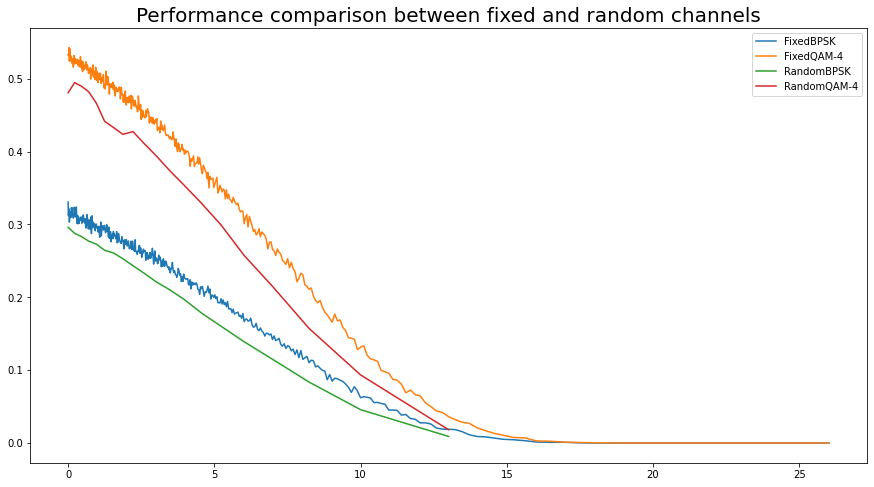

In [25]:
fig = plt.figure(figsize = (15,8))
plt.plot(bestFromFixedChannels[bestFromFixedChannels.signalType == 'BPSK']['SNR (dB)'], bestFromFixedChannels[bestFromFixedChannels.signalType == 'BPSK']['Probability Of Error'])
plt.plot(bestFromFixedChannels[bestFromFixedChannels.signalType == 'QAM-4']['SNR (dB)'], bestFromFixedChannels[bestFromFixedChannels.signalType == 'QAM-4']['Probability Of Error'])
plt.plot(resultsPlotDFRandomChannels[resultsPlotDFRandomChannels.signalType == 'BPSK']['SNR (dB)'], resultsPlotDFRandomChannels[resultsPlotDFRandomChannels.signalType == 'BPSK']['Probability Of Error'])
plt.plot(resultsPlotDFRandomChannels[resultsPlotDFRandomChannels.signalType == 'QAM-4']['SNR (dB)'], resultsPlotDFRandomChannels[resultsPlotDFRandomChannels.signalType == 'QAM-4']['Probability Of Error'])
plt.legend(['FixedBPSK','FixedQAM-4','RandomBPSK','RandomQAM-4'])
plt.title('Performance comparison between fixed and random channels', size = 20)